# Import Libraries

In [1]:
import numpy as np
import pandas as pd
import openml
import matplotlib.pyplot as plt

# Sklearn Imports

In [2]:
from sklearn.linear_model import SGDClassifier
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.utils import shuffle
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix, log_loss

In [3]:
# Ignore all warnings (convergence..) by sklearn
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

In [4]:
# Get dataset by name
dataset = openml.datasets.get_dataset('mnist_784')

# Get the data itself as a dataframe (or otherwise)
X_pd, y_pd, categorical_indicator, attribute_names = dataset.get_data(
    target=dataset.default_target_attribute, dataset_format="dataframe"
)
# Convert to numpy array
X = X_pd.to_numpy()
y = y_pd.to_numpy().astype(np.int32)

In [5]:
# X.shape[0]*0.7

## Train , Test Split by 70% train , 30% test

In [6]:
# Train Split
X_train=X[:49000]
X_test=X[49000:]
# Test Split
y_train=y[:49000]
y_test=y[49000:]

## Question 1

In [7]:
y_test[-1]

6

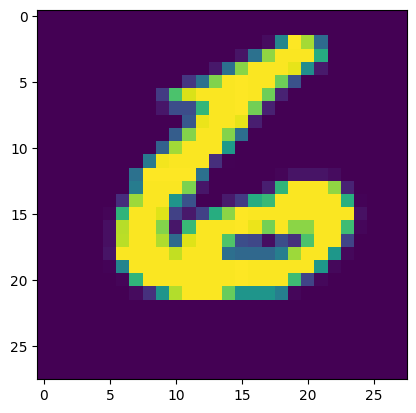

In [8]:
plt.imshow(X_test[-1].reshape(28,28))

In [9]:
dig_6_idx = np.where(y_train == 6)[0]
dig_9_idx = np.where(y_train == 9)[0]
index = np.concatenate((dig_6_idx,dig_9_idx))
# get all samples from the index array
X_train_69 = X_train[index,:]
# create the label vector
y_train_69 = np.concatenate(((np.ones(len(dig_6_idx))*1),(np.ones(len(dig_9_idx))*0)))

In [10]:
dig_6_idx = np.where(y_test == 6)[0]
dig_9_idx = np.where(y_test == 9)[0]
index = np.concatenate((dig_6_idx,dig_9_idx))
# get all samples from the index array
X_test_69 = X_test[index,:]
# create the label vector
y_test_69 = np.concatenate(((np.ones(len(dig_6_idx))*1),(np.ones(len(dig_9_idx))*0)))

In [11]:
X_train_69,y_train_69 = shuffle(X_train_69,y_train_69,random_state=1729)
X_test_69,y_test_69 = shuffle(X_test_69,y_test_69,random_state=1729)

## Q2

In [12]:
y_train_69.sum(axis=0)

4855.0

## Q3

In [13]:
y_test_69.sum()

2021.0

In [14]:
# std=StandardScaler().fit
X_tr_std=StandardScaler().fit_transform(X_train_69)

# Question 4

In [15]:
X_tr_std[0].mean()

0.08128379559427823

In [16]:
X_tr_std[:,0].mean()

0.0

In [17]:
X_tr_std[0].std()

0.7358823226037738

In [18]:
X_tr_std[:,0].std()

0.0

# Question 5

## Option 1

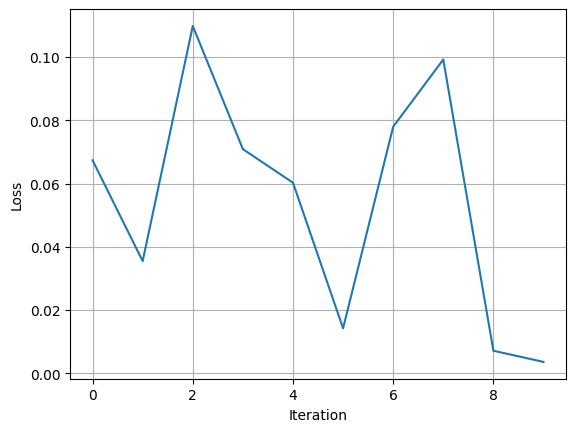

In [19]:
estimator = SGDClassifier(loss='log_loss',
penalty='l2',
max_iter=1,
warm_start=True,
eta0=0.01,
alpha=0,
learning_rate='constant',
random_state=10)
pipe_sgd= make_pipeline(estimator)
Loss=[]
iterations= 10
for i in range(iterations):
    pipe_sgd.fit(X_train_69,y_train_69)
    y_pred = pipe_sgd.predict_proba(X_train_69)
    Loss.append(log_loss(y_train_69,y_pred))
plt.figure()
plt.plot(np.arange(iterations),Loss)
plt.grid(True)
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.show()

## Option 2 

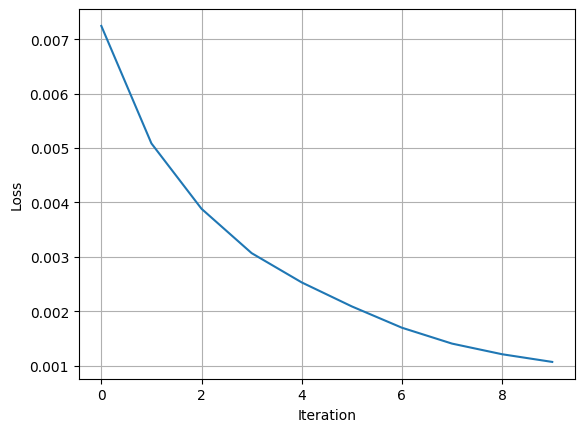

In [20]:
estimator = SGDClassifier(loss='log_loss',
penalty='l2',
max_iter=1,
warm_start=True,
eta0=0.000001,
alpha=0,
learning_rate='constant',
random_state=10)
pipe_sgd= make_pipeline(estimator)
Loss=[]
iterations= 10
for i in range(iterations):
    pipe_sgd.fit(X_train_69,y_train_69)
    y_pred = pipe_sgd.predict_proba(X_train_69)
    Loss.append(log_loss(y_train_69,y_pred))
plt.figure()
plt.plot(np.arange(iterations),Loss)
plt.grid(True)
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.show()

## Option 3

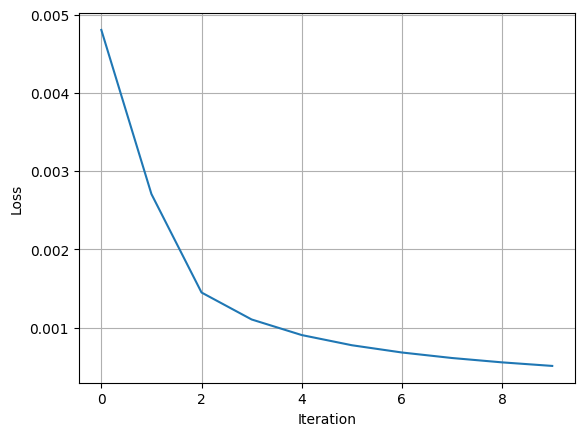

In [21]:
estimator = SGDClassifier(loss='log_loss',
penalty='l2',
max_iter=1,
warm_start=True,
eta0=0.01,
alpha=0,
learning_rate='constant',
random_state=10)
scaler=StandardScaler()
pipe_sgd= make_pipeline(scaler,estimator)
Loss=[]
iterations= 10
for i in range(iterations):
    pipe_sgd.fit(X_train_69,y_train_69)
    y_pred = pipe_sgd.predict_proba(X_train_69)
    Loss.append(log_loss(y_train_69,y_pred))
plt.figure()
plt.plot(np.arange(iterations),Loss)
plt.grid(True)
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.show()

## Option 4

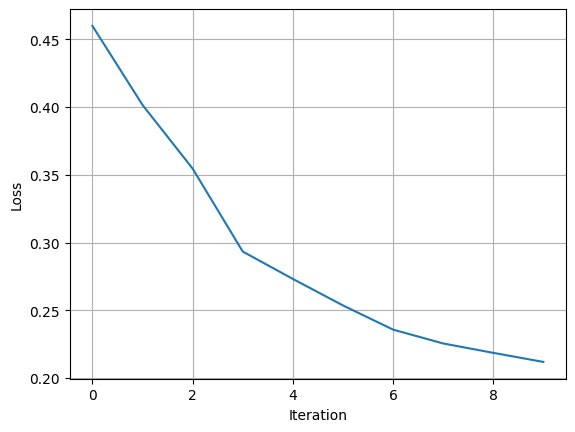

In [22]:
estimator = SGDClassifier(loss='log_loss',
penalty='l2',
max_iter=1,
warm_start=True,
eta0=0.01,
power_t=1,
alpha=0,
learning_rate='invscaling',
random_state=10)
# scaler=StandardScaler()
pipe_sgd= make_pipeline(estimator)
Loss=[]
iterations= 10
for i in range(iterations):
    pipe_sgd.fit(X_train_69,y_train_69)
    y_pred = pipe_sgd.predict_proba(X_train_69)
    Loss.append(log_loss(y_train_69,y_pred))
plt.figure()
plt.plot(np.arange(iterations),Loss)
plt.grid(True)
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.show()